# Demonstration of LTER and IOOS Combo
This notebook demonstrates the basic capabilities of a number of functions/libraries that can be used to pull LTER and IOOS datasets. The basic functionality is demonstrated and explained below.

## Preamble
A few initial set-up libraries to install.

In [1]:
%matplotlib inline

import sys
sys.path.append("../ohw_lter_vis") # go to parent dir
from load_Seward_CTD import make_CTD_dataframe
from load_Seward_zooplankton import make_zooplankton_dataframe
from ioos_lib import *

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


## Pulling in LTER
First, let's pull in some CTD data from LTER. For this demonstration, we're pulling in data from the Southern Gulf of Alaska. **TODO** Fill in more details about the logistics of this.

In [2]:
CTD_df = make_CTD_dataframe()
print('{}-{}'.format(CTD_df.time.min(),CTD_df.time.max()))
CTD_df.head(5)

2012-05-04 05:21:55-2012-05-09 22:16:58


,id,pressure,temperature,temperature2,conductivity,conductivity2,v0,v1,v2,v3,...,instrument,ship,cruise,junk1,PI,purpose,agency,region,junk2,time
0,1,0.0,4.5834,4.5544,2.974495,2.969143,0.2809,0.0005,4.2153,0.0,...,SBE9,R/V Tiglax,TXS12,Hopcroft,Hopcroft,Seward Line Monitoring,NPRB,Gulf of Alaska,n,2012-05-04 05:21:55
1,1,1.0,4.5834,4.5544,2.974495,2.969143,0.2809,0.0005,4.2153,0.0,...,SBE9,R/V Tiglax,TXS12,Hopcroft,Hopcroft,Seward Line Monitoring,NPRB,Gulf of Alaska,n,2012-05-04 05:21:55
2,1,2.0,4.5834,4.5544,2.974495,2.969143,0.2809,0.0005,4.2153,0.0,...,SBE9,R/V Tiglax,TXS12,Hopcroft,Hopcroft,Seward Line Monitoring,NPRB,Gulf of Alaska,n,2012-05-04 05:21:55
3,1,3.0,4.5292,4.5409,2.970221,2.969614,0.2992,0.0005,4.2261,0.0,...,SBE9,R/V Tiglax,TXS12,Hopcroft,Hopcroft,Seward Line Monitoring,NPRB,Gulf of Alaska,n,2012-05-04 05:21:55
4,1,4.0,4.5027,4.5556,2.968559,2.970330,0.2819,0.0006,4.2225,0.0,...,SBE9,R/V Tiglax,TXS12,Hopcroft,Hopcroft,Seward Line Monitoring,NPRB,Gulf of Alaska,n,2012-05-04 05:21:55


Great! Now, let's pull in something interesting to an ecologist: zooplankton reslts.

In [3]:
zoo_df = make_zooplankton_dataframe(year=2012)
zoo_df = zoo_df[zoo_df.time<pd.Timestamp('2012-05-10')]
zoo_df = zoo_df[zoo_df.time>pd.Timestamp('2012-05-04')]
print('{}-{}'.format(zoo_df.time.min(),zoo_df.time.max()))
zoo_df.head()

2012-05-04 11:20:00-2012-05-09 13:45:00


,Cruise,Year,Month,Day,Time (hh:mm:ss AM/PM),Station,Tow Depth (m),Sonic Depth (m),latitude,longitude,...,Class,Subclass,Infraclass,Order,Suborder,Infraorder,Family,Genus,Species,time
1,TXS12,2012,5,9,13:45,GAK1,100,270,59.8448,-149.4663,...,Maxillopoda,Copepoda,Neocopepoda,Calanoida,NaN,NaN,Acartiidae,Acartia,longiremis,2012-05-09 13:45:00
2,TXS12,2012,5,9,13:45,GAK1,100,270,59.8448,-149.4663,...,Maxillopoda,Copepoda,Neocopepoda,Calanoida,NaN,NaN,Acartiidae,Acartia,longiremis,2012-05-09 13:45:00
3,TXS12,2012,5,9,13:45,GAK1,100,270,59.8448,-149.4663,...,Maxillopoda,Copepoda,Neocopepoda,Calanoida,NaN,NaN,Acartiidae,Acartia,NaN,2012-05-09 13:45:00
4,TXS12,2012,5,9,13:45,GAK1,100,270,59.8448,-149.4663,...,Maxillopoda,Copepoda,Neocopepoda,Calanoida,NaN,NaN,Acartiidae,Acartia,NaN,2012-05-09 13:45:00
5,TXS12,2012,5,9,13:45,GAK1,100,270,59.8448,-149.4663,...,Maxillopoda,Copepoda,Neocopepoda,Calanoida,NaN,NaN,Acartiidae,Acartia,NaN,2012-05-09 13:45:00


Now that we have these datasets, let's do a little initial plotting, just to see what we have available to us.

Text(0.5,1,'Surface Temperature')

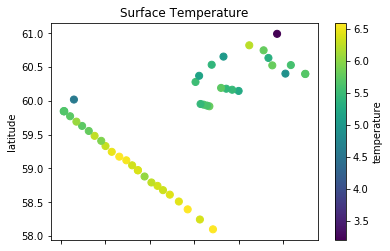

In [4]:
surface = CTD_df[CTD_df['pressure']==0]
#surface.describe()
surface.plot.scatter(x='longitude', y='latitude', c='temperature', s=50, colormap='viridis')
plt.title('Surface Temperature')

Now, let's contextualize this with a map.

In [5]:
# Make a proper map
def make_map(projection=ccrs.PlateCarree(), figsize=(5, 5)):
    fig, ax = plt.subplots(
        figsize=figsize,
        subplot_kw={'projection': projection})
    return fig, ax

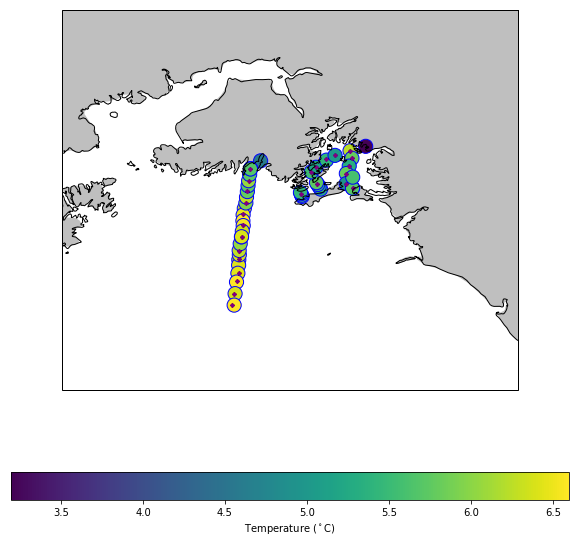

In [6]:
fig, ax = make_map(projection=ccrs.LambertConformal(), figsize=(10, 10))

ax.set_global()
ax.coastlines(resolution='10m', color='k')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='0.75')
ax.set_extent([-154, -142, 58.5, 61.], ccrs.Geodetic())

temps=ax.scatter(surface['longitude'], surface['latitude'], transform=ccrs.Geodetic(), s=200, c=surface['temperature'],
          edgecolors='blue', cmap='viridis', vmin=surface['temperature'].min(), vmax=surface['temperature'].max());
ax.scatter(zoo_df['longitude'], zoo_df['latitude'], transform=ccrs.Geodetic(), s=5, c='purple');
plt.colorbar(temps, orientation='horizontal', label='Temperature ($^\circ$C)')

## Pulling in IOOS
Now, let's try to see what's going on in the oceanographic world. We'll pull in some model data from the same rough time range, and use it as an underlay on the plot.

In [7]:
roi = [-154, -142, 58.5, 61.]
labels = fetch_labels('temperature')
start, stop = fetch_dates(2012, 5, 4, 5)
ds = DataScraper(roi, start, stop, labels, models_only=True)

In [8]:
ds.get_records()
ds.create_database()
ds.df.head(5)

Found 1 records.



,scheme,url,geolink
0,WWW:LINK,https://ecowatch.ncddc.noaa.gov/thredds/dodsC/...,WWW:LINK
1,WWW:LINK,http://www.ncdc.noaa.gov/oa/wct/wct-jnlp-beta....,None
2,OPeNDAP:OPeNDAP,https://ecowatch.ncddc.noaa.gov/thredds/dodsC/...,None
3,OGC:WCS,https://ecowatch.ncddc.noaa.gov/thredds/wcs/nc...,OGC:WCS
4,OGC:WMS,https://ecowatch.ncddc.noaa.gov/thredds/wms/nc...,OGC:WMS


In [9]:
ds.get_models()
print(ds.model_urls)

{'https://ecowatch.ncddc.noaa.gov/thredds/dodsC/ncom/ncom_reg7_agg/NCOM_Region_7_Aggregation_best.ncd': <GridGeo: unknown_1d>}
['https://ecowatch.ncddc.noaa.gov/thredds/dodsC/ncom/ncom_reg7_agg/NCOM_Region_7_Aggregation_best.ncd']


In [10]:
mod = xr.open_dataset(ds.model_urls[0])
mod
tempy = ds.open_models(param_of_interest='water_temp', date_of_interest=start)

In [11]:
tempy

[<xarray.DataArray 'water_temp' (time: 1, lat: 441, lon: 401)>
 [176841 values with dtype=float32]
 Coordinates:
     depth     float64 2.0
   * lat       (lat) float64 10.0 10.12 10.25 10.38 10.5 10.62 10.75 10.88 ...
   * lon       (lon) float64 -150.0 -149.9 -149.8 -149.6 -149.5 -149.4 -149.2 ...
   * time      (time) datetime64[ns] 2012-05-04
     time_run  (time) datetime64[ns] ...
 Attributes:
     units:          degC
     long_name:      Water Temperature
     NAVO_code:      15
     standard_name:  sea_water_temperature]

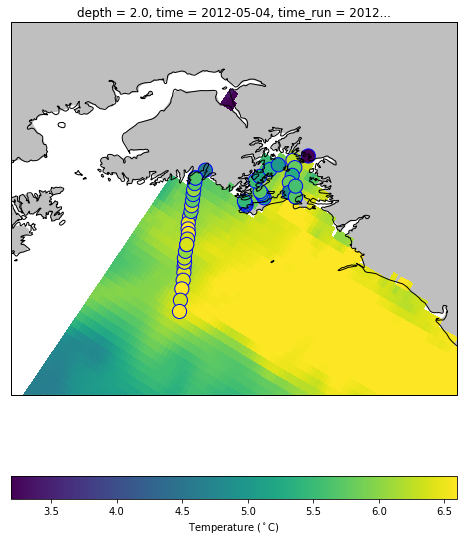

In [30]:
fig, ax = make_map(projection=ccrs.LambertConformal(), figsize=(10, 10))

ax.set_global()
ax.coastlines(resolution='10m', color='k')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='0.75')

CTD_df = CTD_df[CTD_df['pressure']==0]

tfig = tempy[0].plot(x='lon', y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    vmin=np.nanmin(CTD_df['temperature']), 
    vmax=np.nanmax(CTD_df['temperature'])
)

ax.scatter(CTD_df['longitude'], CTD_df['latitude'], transform=ccrs.Geodetic(), s=200, c=CTD_df['temperature'],
          edgecolors='blue', cmap='viridis', vmin=np.nanmin(CTD_df['temperature']), vmax=np.nanmax(CTD_df['temperature']));
ax.set_extent((ds.min_lon, ds.max_lon, ds.min_lat, ds.max_lat))

# move the colorbar to the bottom
foo = fig.get_children()
foo[2].set_visible(False)
plt.colorbar(temps, orientation='horizontal', label='Temperature ($^\circ$C)')

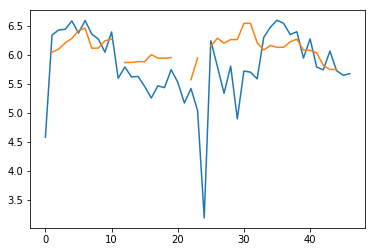

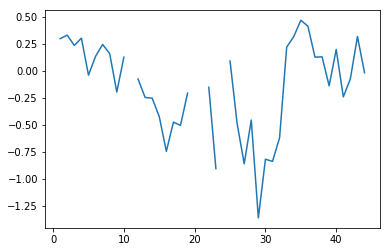

In [55]:
mtemp=[]
for olat,olon in zip(surface.latitude,surface.longitude):
    mtemp.append(tempy[0].interp(lon=olon,lat=olat,method='nearest', assume_sorted=False).values[0])
    
mtemp

plt.figure()
plt.plot(CTD_df['temperature'].values)
plt.plot(mtemp)

plt.figure()
plt.plot((CTD_df['temperature'].values - mtemp))


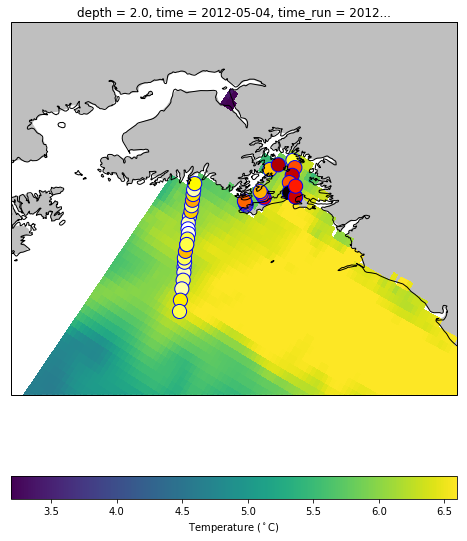

In [60]:
fig, ax = make_map(projection=ccrs.LambertConformal(), figsize=(10, 10))

ax.set_global()
ax.coastlines(resolution='10m', color='k')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='0.75')

CTD_df = CTD_df[CTD_df['pressure']==0]

tfig = tempy[0].plot(x='lon', y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    vmin=np.nanmin(CTD_df['temperature']), 
    vmax=np.nanmax(CTD_df['temperature'])
)

tdiff = CTD_df['temperature'].values - mtemp
ax.scatter(CTD_df['longitude'], CTD_df['latitude'], transform=ccrs.Geodetic(), s=200, c=tdiff,
          edgecolors='blue', cmap='hot', vmin=np.nanmin(tdiff), vmax=np.nanmax(tdiff));
ax.set_extent((ds.min_lon, ds.max_lon, ds.min_lat, ds.max_lat))

# move the colorbar to the bottom
foo = fig.get_children()
foo[2].set_visible(False)
plt.colorbar(temps, orientation='horizontal', label='Temperature ($^\circ$C)')


In [47]:
tempy[0].interp(lon=olon,lat=olat)

<xarray.DataArray 'water_temp' (time: 1)>
array([nan])
Coordinates:
    depth     float64 2.0
  * time      (time) datetime64[ns] 2012-05-04
    time_run  (time) datetime64[ns] 2012-05-04
    lon       float64 -149.5
    lat       float64 59.84
Attributes:
    units:          degC
    long_name:      Water Temperature
    NAVO_code:      15
    standard_name:  sea_water_temperature

In [74]:
# Let's try to compare these things better

temp_df = tempy[0].to_dataframe().reset_index()
temp_df.head(5)

,time,lat,lon,depth,time_run,water_temp
0,2012-05-04,10.0,-150.000,2.0,2012-05-04,25.950001
1,2012-05-04,10.0,-149.875,2.0,2012-05-04,25.902000
2,2012-05-04,10.0,-149.750,2.0,2012-05-04,25.852001
3,2012-05-04,10.0,-149.625,2.0,2012-05-04,25.797001
4,2012-05-04,10.0,-149.500,2.0,2012-05-04,25.733000


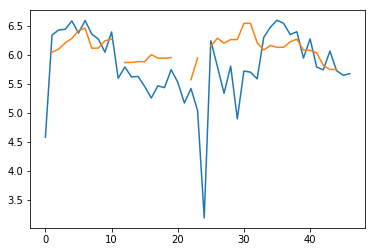

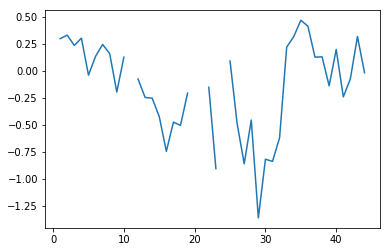

In [95]:
# Now, let's compare against the actual values
mtemp=[]
lat = CTD_df['latitude'].values
lon = CTD_df['longitude'].values
for olat,olon in zip(lat,lon):
    mtemp.append(tempy[0].interp(lon=olon,lat=olat,method='nearest', assume_sorted=False).values[0])

plt.figure()
plt.plot(CTD_df['temperature'].values)
plt.plot(mtemp)

plt.figure()
plt.plot((CTD_df['temperature'].values - mtemp))

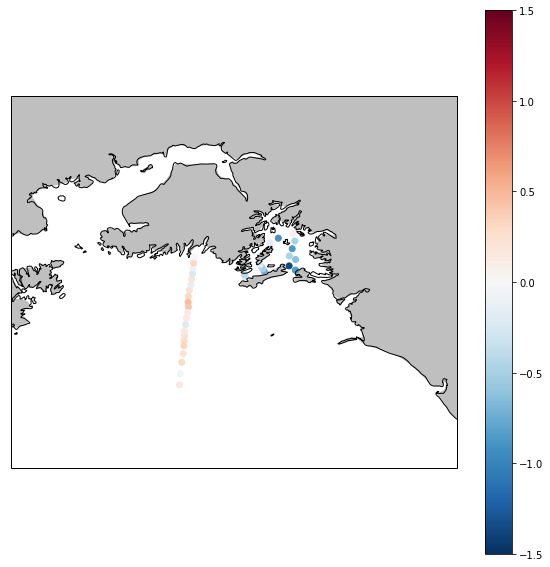

In [104]:
diff = CTD_df['temperature'].values - mtemp

fig, ax = make_map(projection=ccrs.LambertConformal(), figsize=(10, 10))

ax.set_global()
ax.coastlines(resolution='10m', color='k')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='0.75')

# CTD_df = CTD_df[CTD_df['pressure']==0]

# tempy[0].plot(x='lon', y='lat',
#     ax=ax,
#     transform=ccrs.PlateCarree(),
#     vmin=np.nanmin(CTD_df['temperature']), 
#     vmax=np.nanmax(CTD_df['temperature'])
# )
# ax.scatter(CTD_df['longitude'], CTD_df['latitude'], transform=ccrs.Geodetic(), s=200, c=CTD_df['temperature'],
#           edgecolors='blue', cmap='viridis', vmin=np.nanmin(CTD_df['temperature']), vmax=np.nanmax(CTD_df['temperature']));
ax.set_extent((ds.min_lon, ds.max_lon, ds.min_lat, ds.max_lat))
mapper = ax.scatter(lon, lat, c=diff, cmap='RdBu_r',transform=ccrs.Geodetic(),vmin=-1.5, vmax=1.5)
plt.colorbar(mapper)

In [105]:
salty = ds.open_models(param_of_interest='salinity', date_of_interest=start)

In [106]:
salty

[<xarray.DataArray 'salinity' (time: 1, lat: 441, lon: 401)>
 [176841 values with dtype=float32]
 Coordinates:
     depth     float64 2.0
   * lat       (lat) float64 10.0 10.12 10.25 10.38 10.5 10.62 10.75 10.88 ...
   * lon       (lon) float64 -150.0 -149.9 -149.8 -149.6 -149.5 -149.4 -149.2 ...
   * time      (time) datetime64[ns] 2012-05-04
     time_run  (time) datetime64[ns] ...
 Attributes:
     units:          psu
     long_name:      Salinity
     NAVO_code:      16
     standard_name:  sea_water_salinity]

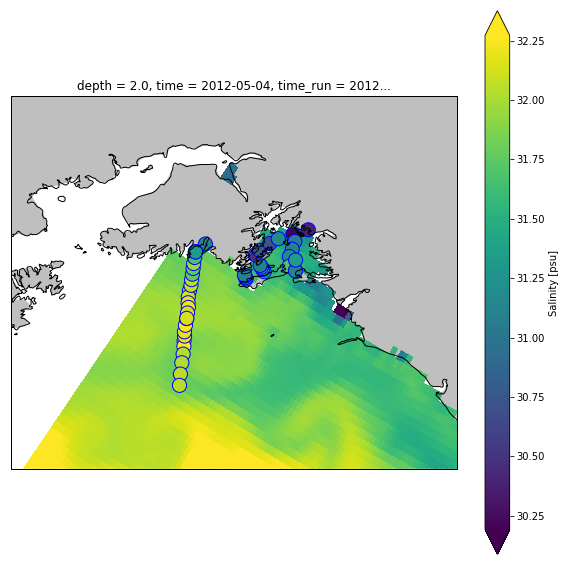

In [107]:
fig, ax = make_map(projection=ccrs.LambertConformal(), figsize=(10, 10))

ax.set_global()
ax.coastlines(resolution='10m', color='k')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='0.75')

CTD_df = CTD_df[CTD_df['pressure']==0]

salty[0].plot(x='lon', y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    vmin=np.nanmin(CTD_df['salinity']), 
    vmax=np.nanmax(CTD_df['salinity'])
)
ax.scatter(CTD_df['longitude'], CTD_df['latitude'], transform=ccrs.Geodetic(), s=200, c=CTD_df['salinity'],
          edgecolors='blue', cmap='viridis', vmin=np.nanmin(CTD_df['salinity']), vmax=np.nanmax(CTD_df['salinity']));
ax.set_extent((ds.min_lon, ds.max_lon, ds.min_lat, ds.max_lat))


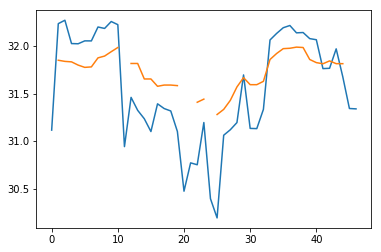

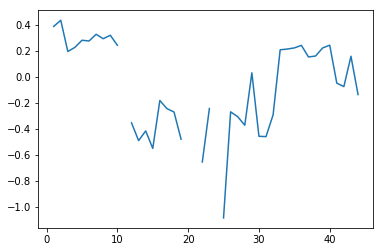

In [109]:
# Now, let's compare against the actual values
mtemp=[]
lat = CTD_df['latitude'].values
lon = CTD_df['longitude'].values
for olat,olon in zip(lat,lon):
    mtemp.append(salty[0].interp(lon=olon,lat=olat,method='nearest', assume_sorted=False).values[0])

plt.figure()
plt.plot(CTD_df['salinity'].values)
plt.plot(mtemp)

plt.figure()
plt.plot((CTD_df['salinity'].values - mtemp))

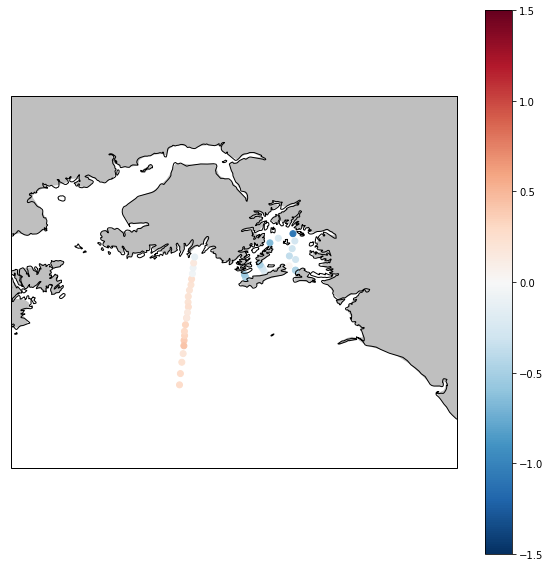

In [110]:
diff = CTD_df['salinity'].values - mtemp

fig, ax = make_map(projection=ccrs.LambertConformal(), figsize=(10, 10))

ax.set_global()
ax.coastlines(resolution='10m', color='k')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='0.75')

# CTD_df = CTD_df[CTD_df['pressure']==0]

# tempy[0].plot(x='lon', y='lat',
#     ax=ax,
#     transform=ccrs.PlateCarree(),
#     vmin=np.nanmin(CTD_df['temperature']), 
#     vmax=np.nanmax(CTD_df['temperature'])
# )
# ax.scatter(CTD_df['longitude'], CTD_df['latitude'], transform=ccrs.Geodetic(), s=200, c=CTD_df['temperature'],
#           edgecolors='blue', cmap='viridis', vmin=np.nanmin(CTD_df['temperature']), vmax=np.nanmax(CTD_df['temperature']));
ax.set_extent((ds.min_lon, ds.max_lon, ds.min_lat, ds.max_lat))
mapper = ax.scatter(lon, lat, c=diff, cmap='RdBu_r',transform=ccrs.Geodetic(),vmin=-1.5, vmax=1.5)
plt.colorbar(mapper)